# Explore Workbook for Justin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare
import explore

## Explore Equipment Rail

**Acquire**

In [20]:
df = acquire.get_equiprail()
df.shape

(22402, 146)

**Prepare**

In [21]:
df = prepare.prep_equip_df(df)
df.shape

(11504, 32)

In [22]:
df.head()

,railroad_company,accident_type,state,temp,visibility,weather,train_speed,train_direction,train_weight,train_type,...,total_damage,engineers_onduty,conductors_onduty,brakemen_onduty,region,typrr,lat,long,signal_type,date
incdtno,,,,,,,,,,,,,,,,,,,,,
GC0512102,BNSF,1,48,84,2,1,10,2.0,9811,1,...,25500,1.0,1.0,0.0,5,1,29.7559,-95.2931,1,2012-05-05 08:00:00
GC0512105,BNSF,1,48,70,4,3,5,2.0,17157,1,...,10940,1.0,1.0,0.0,5,1,29.500571,-95.597089,2,2012-05-11 02:25:00
GC0512106,BNSF,1,48,84,2,1,3,2.0,17304,1,...,10500,1.0,1.0,0.0,5,1,31.446576,-96.20760600000001,2,2012-05-16 15:40:00
GC0512112,BNSF,1,48,70,4,1,5,3.0,14212,1,...,11664,1.0,1.0,0.0,5,1,29.772154999999998,-95.384013,2,2012-05-31 03:36:00
GC0912118,BNSF,1,48,78,2,3,8,1.0,5918,1,...,255000,1.0,1.0,0.0,5,1,29.606296999999998,-95.300054,2,2012-09-29 14:10:00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11504 entries, GC0512102 to 162814
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   railroad_company   11504 non-null  object        
 1   accident_type      11504 non-null  int64         
 2   state              11504 non-null  int64         
 3   temp               11504 non-null  int64         
 4   visibility         11504 non-null  int64         
 5   weather            11504 non-null  int64         
 6   train_speed        11504 non-null  int64         
 7   train_direction    11504 non-null  float64       
 8   train_weight       11504 non-null  int64         
 9   train_type         11504 non-null  object        
 10  track_type         11504 non-null  int64         
 11  front_engines      11504 non-null  int64         
 12  loadfrght_cars     11504 non-null  int64         
 13  loadpass_cars      11504 non-null  int64         
 14  em

In [46]:
def drop_under_represented_rr(df): 
    '''
    This function takes in a railroad accident data frame
    and drops any observations representing railroad companies
    where the railroad company has less than 300 accidents in the dataframe
    
    It returns a single dataframe
    '''
    
    #Define the value counts for railroad_company in the dataframe
    value_counts = df['railroad_company'].value_counts()
    
    #Select the observations to remove based on railroad_company count representation threshold
    to_remove = value_counts[value_counts < 300].index
    
    # Keep rows where the railroad_company column is not in to_remove if n was defined
    if 300 > 0:
        df = df[~df.railroad_company.isin(to_remove)]
    else: 
        df = df 
        
    return df

In [47]:
df = drop_ur_rr(df)
df.shape

NameError: name 'drop_ur_rr' is not defined

**Explore Univariate**

In [ ]:
def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)
        
def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='white', edgecolor='grey')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='white', edgecolor='grey')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table

In [ ]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

In [ ]:
explore_univariate(df, cat_vars, quant_vars)

**Takeaways:**
    - Outlier in train speed? What train travels at 545 mph?
    - What is going on with the State column? Expected 50 but shows 56. Are the 6 extra representing terratories in the US?
    - Track Damages and Equip damages have outliers which is expected    

**More Univariate Exploration**

In [ ]:
df.info()

In [ ]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["total_killed", "total_injured", "max_speed", "total_damage", 
              "engineers_onduty", "conductors_onduty", "brakemen_onduty", "region",
             "signal_type"]

In [ ]:
explore_univariate(df, cat_vars, quant_vars)

**Takeaways:**
    - What does signal feature mean? The majority of the equip accidents are classified as not signaled...but what does that actually mean?
    

---

**Explore Outliers**

In [52]:
def outlier_report(df):
    '''
    This function takes in a data frame and returns
    print statments stating the upper and lower bound outliers for 
    each column
    '''
    
    columns_to_check = ["temp",
                        "train_speed",
                        "train_weight",
                        "equip_damage",
                        "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                        "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    
    for col in columns_to_check:
        quartile_01, quartile_03 = np.percentile(df[col], [25, 75])
        iqr = quartile_03 - quartile_01
    
        lower_bound = round(quartile_01 -(2 * iqr), 3)
        upper_bound = round(quartile_03 +(2 * iqr), 3)
    
        #df['outlier'] = df[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    

        print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

In [53]:
outlier_report(df)

The lower and upper bound of the range for 'temp' respectively is: -26.0 and 144.0
The lower and upper bound of the range for 'train_speed' respectively is: -26.0 and 49.0
The lower and upper bound of the range for 'train_weight' respectively is: -13366.0 and 20049.0
The lower and upper bound of the range for 'equip_damage' respectively is: -67789.75 and 126031.5
The lower and upper bound of the range for 'track_damage' respectively is: -54594.5 and 82034.25
The lower and upper bound of the range for 'total_killed' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'total_injured' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'max_speed' respectively is: -26.0 and 49.0
The lower and upper bound of the range for 'total_damage' respectively is: -127095.0 and 234898.75
The lower and upper bound of the range for 'engineers_onduty' respectively is: 1.0 and 1.0
The lower and upper bound of the range for 'conductors_onduty' respectively is: 1.0 a

In [ ]:
def visualize_outliers(df):
    '''
    This function takes in a dataframe
    and outputs boxplots to show outlier distribution
    for each column in the the dataframe
    '''
    cols_to_check = ["temp",
                    "train_speed",
                    "train_weight",
                    "equip_damage",
                    "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                    "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    for col in cols_to_check:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

In [ ]:
visualize_outliers(df)

**Takeaways:**
   - Need to investigate outliers in:
        - max_speed & train speed...one over 500 mph
        - train weight
        - one super negative temp

**Split the Data**

In [24]:
train, validate, test = explore.train_validate_test_split(df, 'railroad_company', seed=444)
print(f'Train Shape: {train.shape}')
print(f'Validate Shape: {validate.shape}')
print(f'Test Shape: {test.shape}')

Train Shape: (6442, 32)
Validate Shape: (2761, 32)
Test Shape: (2301, 32)


**Is there a time of year where rail equipment accidents happen with more or less frequency?**

In [ ]:
train['month'] = pd.DatetimeIndex(train['date']).month
train.head()

In [ ]:
train.month.hist()

In [ ]:
train['season'] = train.month.apply(lambda x: "winter/fall" if x == 10 or 11 == 12 or x == 1 or x == 2 or x == 3 else "summer/spring")
train.head()
        

In [ ]:
train.season.hist()

**Takeaways:**
- Rail equipment accidents appear to happen more frequently in summer/spring months than in winter/fall months 

---

**Explore Bivariate**

In [43]:
def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, 'railroad_company', cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, 'railroad_company', quant)


### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='white', edgecolor='grey')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='white', edgecolor='grey')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
   # p = plot_cat_by_target(train, target, cat_var)
    
    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    #plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

#def plot_cat_by_target(train, target, cat_var):
#    p = plt.figure(figsize=(2,2))
#    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
#    overall_rate = train[target].mean()
#    p = plt.axhline(overall_rate, ls='--', color='gray')
#    return p
    

## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)

In [44]:
#Breakdown the features by categories for Univariate and Bivariate Functions from Explore Module
categorical_target = 'railroad_company'
cat_vars = ["train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

train_type 
_____________________

          chi2  p-value  degrees of freedom
0  5206.398799      0.0                  40

observed:
 railroad_company  ATK  BNSF  CSX   NS    UP   All
train_type                                       
1                   1   941  502  582  1394  3420
2                 278     1    1    1     0   281
3                   3     0    0    0     0     3
4                   6     5    1   12    25    49
5                   0     5   16    3    34    58
6                   0    15   68   20     8   111
7                  41   620  216  302   777  1956
8                  51   119   20   68   154   412
9                   2    46    2    0     2    52
A                   4    17    4    5    39    69
B                  30     1    0    0     0    31
All               416  1770  830  993  2433  6442

expected:
              0           1           2           3            4
0   220.850667  939.677119  440.639553  527.174790  1291.657870
1    18.145917   77.20738

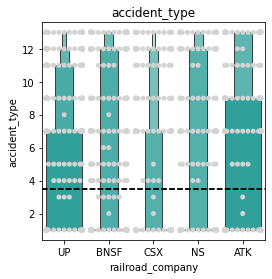

                   count      mean       std  min  25%  50%  75%   max
railroad_company                                                      
ATK                416.0  7.045673  4.229025  1.0  1.0  7.0  9.0  13.0
BNSF              1770.0  3.205085  4.127186  1.0  1.0  1.0  1.0  13.0
CSX                830.0  2.897590  3.687146  1.0  1.0  1.0  1.0  13.0
NS                 993.0  3.103726  4.085073  1.0  1.0  1.0  1.0  13.0
UP                2433.0  3.466502  4.113996  1.0  1.0  1.0  7.0  13.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

state 
____________________



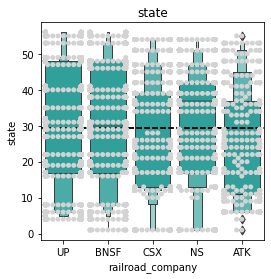

                   count       mean        std  min   25%   50%   75%   max
railroad_company                                                           
ATK                416.0  24.963942  15.224304  1.0  11.0  24.0  37.0  55.0
BNSF              1770.0  30.538983  15.672305  1.0  17.0  30.0  48.0  56.0
CSX                830.0  28.360241  15.020424  1.0  13.0  26.0  39.0  54.0
NS                 993.0  30.204431  15.748256  1.0  17.0  37.0  42.0  54.0
UP                2433.0  29.403617  16.982814  4.0  17.0  29.0  48.0  56.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

temp 
____________________



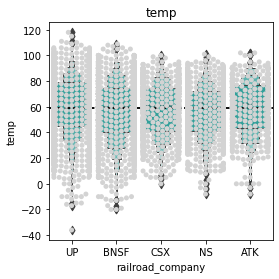

                   count       mean        std   min    25%   50%   75%    max
railroad_company                                                              
ATK                416.0  59.502404  22.116776  -8.0  43.75  62.0  77.0  102.0
BNSF              1770.0  56.168362  23.613764 -20.0  40.00  59.5  75.0  109.0
CSX                830.0  58.408434  21.270177   0.0  41.00  61.0  75.0  100.0
NS                 993.0  58.249748  20.466487  -8.0  41.00  63.0  72.0  101.0
UP                2433.0  61.434854  22.488373 -36.0  45.00  65.0  79.0  118.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

visibility 
____________________



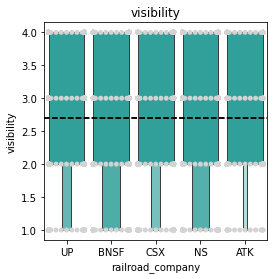

                   count      mean       std  min  25%  50%  75%  max
railroad_company                                                     
ATK                416.0  2.718750  0.981876  1.0  2.0  2.0  4.0  4.0
BNSF              1770.0  2.632203  1.084753  1.0  2.0  2.0  4.0  4.0
CSX                830.0  2.809639  1.052267  1.0  2.0  3.0  4.0  4.0
NS                 993.0  2.683787  1.074216  1.0  2.0  2.0  4.0  4.0
UP                2433.0  2.732840  1.038397  1.0  2.0  2.0  4.0  4.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

weather 
____________________



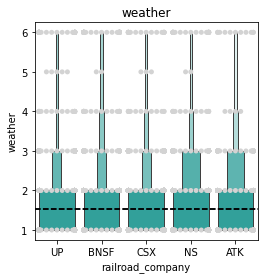

                   count      mean       std  min  25%  50%  75%  max
railroad_company                                                     
ATK                416.0  1.490385  1.010739  1.0  1.0  1.0  2.0  6.0
BNSF              1770.0  1.458192  0.993309  1.0  1.0  1.0  2.0  6.0
CSX                830.0  1.573494  0.986652  1.0  1.0  1.0  2.0  6.0
NS                 993.0  1.551863  1.008822  1.0  1.0  1.0  2.0  6.0
UP                2433.0  1.547472  0.873770  1.0  1.0  1.0  2.0  6.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

train_speed 
____________________



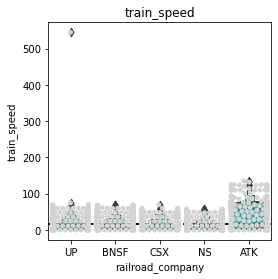

                   count       mean        std  min  25%   50%   75%    max
railroad_company                                                           
ATK                416.0  47.615385  35.450507  0.0  5.0  57.0  76.0  135.0
BNSF              1770.0  12.719209  14.263083  0.0  5.0   7.0  10.0   69.0
CSX                830.0  12.798795  13.541849  0.0  4.0   7.0  15.0   70.0
NS                 993.0  10.582075  12.658255  0.0  4.0   6.0  10.0   58.0
UP                2433.0  14.885327  19.365267  0.0  4.0   7.0  20.0  545.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

train_direction 
____________________



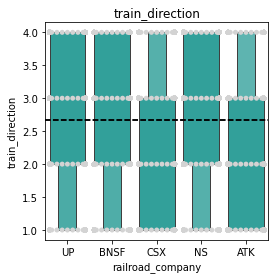

                   count      mean       std  min  25%  50%  75%  max
railroad_company                                                     
ATK                416.0  2.403846  1.136634  1.0  1.0  2.0  3.0  4.0
BNSF              1770.0  2.905650  1.035067  1.0  2.0  3.0  4.0  4.0
CSX                830.0  2.302410  1.122795  1.0  1.0  2.0  3.0  4.0
NS                 993.0  2.713998  1.112962  1.0  2.0  3.0  4.0  4.0
UP                2433.0  2.661323  1.092914  1.0  2.0  3.0  4.0  4.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

train_weight 
____________________



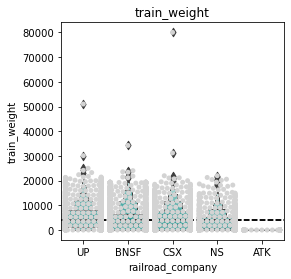

                   count         mean          std  min     25%     50%  \
railroad_company                                                          
ATK                416.0     0.000000     0.000000  0.0     0.0     0.0   
BNSF              1770.0  4323.719209  5481.048433  0.0     0.0  2439.5   
CSX                830.0  4431.263855  5968.455090  0.0     0.0  1972.5   
NS                 993.0  2935.521652  4267.509535  0.0     0.0   297.0   
UP                2433.0  5410.782162  5195.444542  0.0  1244.0  3933.0   

                     75%      max  
railroad_company                   
ATK                  0.0      0.0  
BNSF              6463.0  34247.0  
CSX               7674.5  80043.0  
NS                5110.0  22000.0  
UP                8009.0  51015.0   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

equip_damage 
____________________



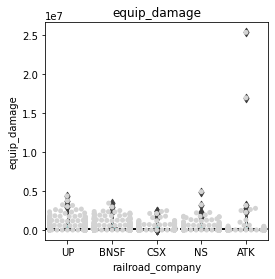

                   count           mean           std  min       25%      50%  \
railroad_company                                                                
ATK                416.0  177236.603365  1.523030e+06  0.0  12999.00  20000.0   
BNSF              1770.0  100013.118644  3.054684e+05  0.0   9425.00  18000.0   
CSX                830.0   93358.756627  2.376496e+05  0.0  14035.25  27048.0   
NS                 993.0   83874.135952  2.982422e+05  0.0   5150.00  14350.0   
UP                2433.0   94633.482532  3.015323e+05  0.0   7981.00  18091.0   

                       75%         max  
railroad_company                        
ATK               36242.50  25406000.0  
BNSF              45000.00   3450302.0  
CSX               69755.75   2485861.0  
NS                33400.00   4931037.0  
UP                50933.00   4395775.0   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

track_damage 
____________________



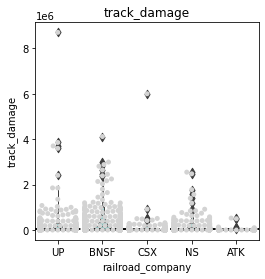

                   count          mean            std  min    25%     50%  \
railroad_company                                                            
ATK                416.0   5787.634615   37058.025101  0.0    0.0     0.0   
BNSF              1770.0  86942.835028  276526.983915  0.0    0.0  7150.0   
CSX                830.0  27316.419277  217014.937544  0.0  100.0  1500.0   
NS                 993.0  46695.174220  173802.211877  0.0  500.0  9355.0   
UP                2433.0  55038.180025  253320.686875  0.0  200.0  7460.0   

                      75%        max  
railroad_company                      
ATK                1000.0   525000.0  
BNSF              40000.0  4119720.0  
CSX               10203.0  6005760.0  
NS                25125.0  2549657.0  
UP                39162.0  8711005.0   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________



In [45]:
explore_bivariate(train, 'railroad_company', binary_vars, quant_vars)

**Takeaways:**
    - Temperature spread is varied by railroad...Is this beacuse certain railroads operate in more specific climates?

---

## Explore HWY Rail

**Acquire HWY Rail**

In [2]:
hwy_df = acquire.get_hwyrail()
hwy_df.head()

,AMTRAK,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,...,NARR1,NARR2,NARR3,NARR4,NARR5,SUBDIV,ROADCOND,VIDEOT,VIDEOU,Unnamed: 103
0,NaN,12,3,UP,0312RS009,NaN,NaN,,,12.0,...,HIEHWAY USER'S ACTIONS: STOPPED ON CROSSING ( ...,NaN,NaN,NaN,NaN,WOODBRIDGE,B,1,2,NaN
1,NaN,12,3,UP,0312RS025,NaN,NaN,,,12.0,...,HIGHWAY USER'S ACTIONS: STOPPED ON CROSSING ( ...,D LEFT THE SCENE.,NaN,NaN,NaN,FRESNO SUB,A,1,2,NaN
2,NaN,12,10,BNSF,CA1012201,NaN,NaN,,,12.0,...,DRIVER AGE UNKNOW. 41: ABANDONED VEHICLE,NaN,NaN,NaN,NaN,SAN BERNARDINO,A,1,2,NaN
3,NaN,12,10,BNSF,CA1012202,NaN,NaN,,,12.0,...,12/18/12 PER CONTRA COSTA COUNTY CORONERS REPO...,NaN,NaN,NaN,NaN,STOCKTON,A,1,1,NaN
4,NaN,12,7,BNSF,CA0712201,NaN,NaN,,,12.0,...,NaN,NaN,NaN,NaN,NaN,STOCKTON,A,1,2,NaN


**Prep HWY Rail**

In [3]:
hwy_df = prepare.prep_hwy_df(hwy_df)
hwy_df.shape

(12181, 48)

**Explore HWY Rail Univariate**

In [5]:
hwy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12181 entries, 0312RS009 to 193825
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   railroad_company    12181 non-null  object        
 1   station             12181 non-null  object        
 2   county              12181 non-null  object        
 3   state               12181 non-null  int64         
 4   region              12181 non-null  int64         
 5   city                12181 non-null  object        
 6   vehicle_speed       12181 non-null  float64       
 7   vehicle_type        12181 non-null  object        
 8   vehicle_direction   12181 non-null  object        
 9   position            12181 non-null  object        
 10  accident_type       12181 non-null  int64         
 11  hazmat_entity       12181 non-null  object        
 12  temp                12181 non-null  int64         
 13  visibility          12181 non-null  int64 

In [10]:
cat_vars = ["railroad_company", "station", "county", "city", "vehicle_type", "vehicle_direction", "position",
           "hazmat_entity", "weather", "train_type", "track_type"]
quant_vars = ["vehicle_speed", "temp", "total_killed", "total_injured"]

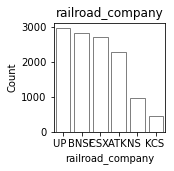

     railroad_company  Count  Percent
UP               UP     2959    24.29
CSX              BNSF   2825    23.19
NS               CSX    2715    22.29
BNSF             ATK    2274    18.67
ATK              NS      956     7.85
KCS              KCS     452     3.71
_________________________________________________________________


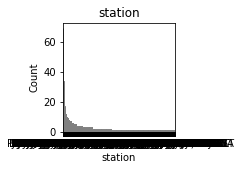

                                   station  Count  Percent
HOUSTON               WOODBRIDGE               69     0.57
CHICAGO               ACAMPO                   61     0.50
BIRMINGHAM            LOS NIETOS               53     0.44
LOUISVILLE            FRESNO                   53     0.44
JACKSONVILLE          BAKERSFIELD              50     0.41
...                                    ...    ...      ...
NORTH PINE BLUFF      ANAMIN SPUR               1     0.01
DAGGETT               SMITHSBURG                1     0.01
GREENWAY              INWOOD ST                 1     0.01
FEC CONNECTION        MONTEVIDEO ROAD           1     0.01
DELAPLANE             SUWANNEE                  1     0.01

[4865 rows x 3 columns]
_________________________________________________________________


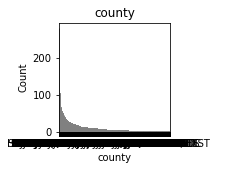

                                    county  Count  Percent
JEFFERSON             SAN JOAQUIN             282     2.32
HARRIS                LOS ANGELES             233     1.91
COOK                  FRESNO                  169     1.39
SHELBY                KERN                    151     1.24
MARION                SAN BENITO              128     1.05
...                                    ...    ...      ...
CLOUD                 WINNEBAGO                 1     0.01
CHITTENDEN            PROWERS                   1     0.01
EMMET                 MODOC                     1     0.01
ROCKBRIDGE            SEBASTIAN                 1     0.01
WOODRUFF              IMPERIAL                  1     0.01

[1098 rows x 3 columns]
_________________________________________________________________


KeyboardInterrupt: 

In [11]:
explore_univariate(hwy_df, cat_vars, quant_vars)